# Principal Component Analysis (PCA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
from numpy.random import randn, rand, seed

## Maximum Variance Formulation
Let $\mathcal D = \{{\bf x}_n | {\bf x} \in \mathbb{R}^D\}_{n=1}^N$ be a dataset. We seek to maximize the variances of the projected data.

Consider the following optimization problem 

$$
\begin{aligned}
    \max_{{\bf u}_1} &\ {{\bf u}_1^T{\bf S}{\bf u}_1} \\
    \text{s.t.} &\ {\bf u}_1^T{\bf u}_1 = 1
\end{aligned} 
$$

Where
$$
    {\bf S} = \frac{1}{N} \left({\bf x}_n - \bar{\bf x}\right)\left({\bf x}_n - \bar{\bf x}\right)^T
$$

In [2]:
%config InlineBackend.figure_format = "retina"
np.set_printoptions(precision=8, suppress=True)

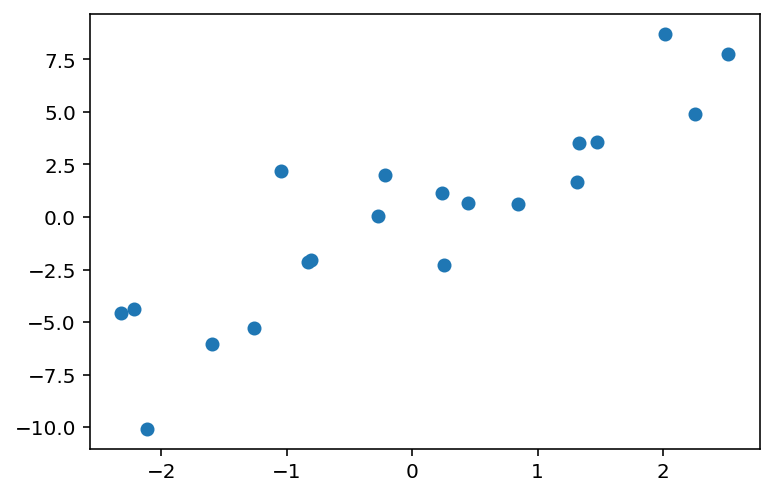

In [3]:
seed(314)
nsamples = 20
x1 = np.linspace(0, 5, nsamples) + rand(nsamples) * 0.5
x2 = 3 * x1 + 5 + randn(nsamples) * 2
X = np.c_[x1, x2]
X_bar = X.mean(axis=0, keepdims=True)
X = X - X_bar
plt.scatter(*X.T);

In [4]:
S = np.einsum("ij,ik->jk", X, X) / nsamples
eigvals, eigvects = eig(S)

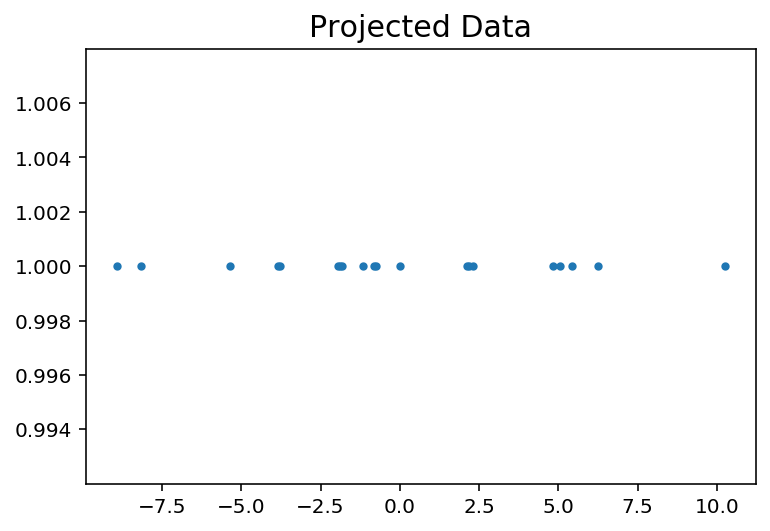

In [5]:
l = eigvals.argmax()
u1 = eigvects[:, [l]]

X_proj = X @ u1

plt.scatter(X_proj, np.ones(nsamples), s=10)
plt.title("Projected Data", fontsize=15);

### Sklearn Comparisson

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)
np.c_[X_proj, pca.transform(X)]

array([[ 5.03735819,  5.03735819],
       [ 4.84525815,  4.84525815],
       [10.25831817, 10.25831817],
       [ 6.24658612,  6.24658612],
       [ 5.44117203,  5.44117203],
       [-1.82480268, -1.82480268],
       [ 2.29403076,  2.29403076],
       [ 2.17571813,  2.17571813],
       [-1.87417678, -1.87417678],
       [ 0.01966285,  0.01966285],
       [-1.14778433, -1.14778433],
       [ 2.1336971 ,  2.1336971 ],
       [-0.76726156, -0.76726156],
       [-0.81728617, -0.81728617],
       [-3.76828303, -3.76828303],
       [-1.95309679, -1.95309679],
       [-3.84657501, -3.84657501],
       [-8.93551976, -8.93551976],
       [-5.35347892, -5.35347892],
       [-8.16353646, -8.16353646]])

**Proposition**: The linear projection onto an $M$-dimensional subspace that maximizes the variance of the projected data is defined by the $M$ eigenvectors of the data covariance matrix $S$, corresponding to the $M$ largest eigenvalues

In [19]:
l1 = eigvals.argmax()
l2 = eigvals.argmin()

u1 = eigvects[:, [l1]]
u2 = eigvects[:, [l2]]

u1.T @ u2

array([[0.]])